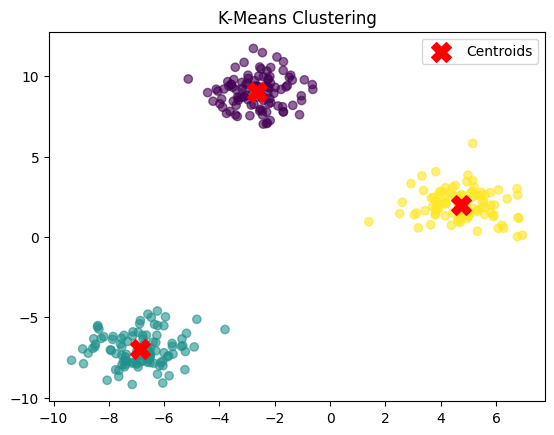

In [4]:
# Implementation of K-Means algorithm

import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol  # Convergence tolerance

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.k, replace=False)]

        for _ in range(self.max_iters):
            # Assign clusters
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Compute new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

            # Check convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Example usage
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
kmeans = KMeans(k=3)
kmeans.fit(X)

# Plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()


In [5]:
# Implementation of Perceptron
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, max_iters=1000):
        self.lr = learning_rate
        self.max_iters = max_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y = np.where(y <= 0, -1, 1)  # Convert labels to -1, 1

        for _ in range(self.max_iters):
            for i in range(n_samples):
                update = self.lr * y[i]
                if y[i] * (np.dot(X[i], self.weights) + self.bias) <= 0:
                    self.weights += update * X[i]
                    self.bias += update

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

# Example usage
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic binary classification data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert to -1, 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, max_iters=1000)
perceptron.fit(X_train, y_train)

# Predict
y_pred = perceptron.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(np.where(y_test == -1, 0, 1), y_pred) * 100:.2f}%")


Accuracy: 100.00%
